# Predicting Malignant Breast Cancer Tumors

##### Using data from the State of Wisconsin on Breast Cancer tumors, can we predict whether a tumor is malignant? Getting an accurate model with a very small level of False Negatives is imperative, and could allow for malignant tumors to be identified faster than they normally would, which could mean better treatment results for the patients. 

We want a high accuracy rate, but ensuring that there are minimal amounts of False Negatives is equally or more important. If we have false negatives, then those patients could end up having a delayed diagnosis, and delayed treatment, which in some cases can be fatal.


## Import Libraries

In [55]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc, roc_auc_score, mean_squared_error
from math import sqrt


import warnings
#use to ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Import and Summarize Data

###### Reading in the data:

In [2]:
df = pd.read_csv('zippedData/cancer.csv')

##### Showing and describing the data:
First Five Rows:

In [3]:
#first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Last Five Rows:


In [4]:
#last five rows
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Getting the shape of the data:

In [5]:
#Show the shape of the data
df.shape

(569, 33)

From this, we can see that there are: 
33 columns, with 569 total rows.

Getting summary statistics:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Getting Unique Values in our Target Variable (Diagnosis):

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

We can see that tumors are either classified as M-Malignant, or B-Benign.

Getting the number of benign vs. malignant classification:

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Plotting for visual:

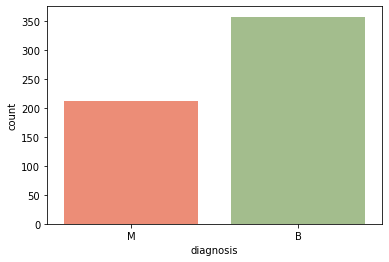

In [9]:
sns.countplot(df['diagnosis'], palette= ['#FF8164', '#a3c585']);

## Clean and Prepare Data

To start off, I am removing the "id" and "Unnamed: 32" columns, as they are not needed for the purposes of this model. 

In [10]:
#remove column "id" and "Unnamed: 32"
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since Diagnosis is a categorical variable, I will be mapping malignant tumors to a value of 1, and benign tumors to a value of 0 so that we are able to work with the model.

In [12]:
#mapping malignant to 1, and benign to 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Checking for any null values:

In [13]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no null values, so now I will be checking for collinearity.

###### Multicollinearity:


In [ ]:
df.corr()

Plotting as heatmap for better visibility:

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues" )


From this I am noticing that some of the columns appear to have some collinearity, multicollinearity is a problem as it undermines the significance of independent variables, so I will do some additional mapping to see if we need to exclude any variables from the model.

Checking the "mean" columns:

In [ ]:
# Generate a scatter plot matrix with the "mean" columns
means = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[means], hue='diagnosis', palette= ['#a3c585','#FF8164'])

There is a close correlation between the radius_mean column with perimeter_mean and area_mean columns. This is likely because the three columns contain very similar information: the physical size of the the tumor/cell. This means we should only pick one of the columns for analysis, and I will be removing all columns related to perimeter or radius (and just keeping the area columns).

Checking the "mean" vs. "worst" columns:

In [ ]:
# Generate a scatter plot matrix with the "mean" and "worst" columns
meansWorst = ['diagnosis',
        'texture_worst',  
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst', 
        'texture_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[meansWorst], hue='diagnosis', palette= ['#a3c585','#FF8164'])

From this plot, we can see there is a strong correlation between the "worst" and the "mean" columns. Because of that, I will be removing the "worst" columns and keeping the "mean" columns.

Checking the remaining columns:

In [ ]:
# Generate a scatter plot matrix with the "mean" and "worst" columns
meansFinal= ['diagnosis',  
        'texture_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean',
        'radius_se',
        'texture_se', 
        'smoothness_se', 
        'compactness_se',
       'symmetry_se', 
        'fractal_dimension_se']

sns.pairplot(data=df[meansFinal], hue='diagnosis', palette= ['#a3c585','#FF8164'])

From this, I am noticing that compactness, concave_points, and and concavity all seem to be similar as well. I will be keeping compactness and removing the other two columns.

##### Cleaning up Columns:

Dropping all the columns that were mentioned above:

In [14]:
#dropping "worst" columns
columns = [
        'texture_worst',  
        'area_worst',
        'radius_worst',
        'smoothness_worst', 
        'perimeter_worst',
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(columns, axis=1)

In [15]:
#dropping "perimeter" and "radius" columns
columns = [
        'perimeter_mean',
        'perimeter_se', 
        'radius_mean', 
        'radius_se']
df = df.drop(columns, axis=1)

In [16]:
#dropping "concave points" and "concavity" columns
columns = [
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(columns, axis=1)

##### Final Columns:

In [17]:
df.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

## Building the Model

Splitting the target variable:

In [18]:
#splitting the target variable from the rest of the variables
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

Splitting into test and training data:

In [19]:
#splitting data into test and train data
SEED = 5
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=SEED)

##### Feature Scaling:

Scaling features can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function faster. We scale so that the algorithm is not biased towards the feature with values higher in magnitude.

In [20]:
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [22]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.93421926910299


##### Logistic Regression Model:

Training the data to a logistic regression, and predicting on the test data

In [23]:
lr = LogisticRegression(C=100, penalty="l2")
modelLR=lr.fit(X_train,y_train)
predictionLR=modelLR.predict(X_test)

Show in Confusion Matrix:

In [24]:
lrmatrix = confusion_matrix(y_test, predictionLR)
lrmatrix

array([[83,  5],
       [ 3, 52]], dtype=int64)

<AxesSubplot:>

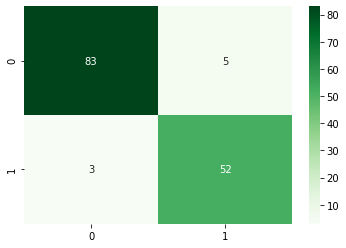

In [25]:
#Heatmapping
sns.heatmap(lrmatrix, annot=True, cmap="Greens")
#lean more on FN, use classification report

This shows us that out of 143 results, only 3 were classified as a false negative, which is approximately 2.1%.

In [26]:
y_hat_train = modelLR.predict(X_train)
y_hat_test = modelLR.predict(X_test)
#grid search

In [27]:
cr = classification_report(y_test,y_hat_test)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.91      0.95      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



0.06293706293706294


In [28]:
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.934640522875817
Testing Precision:  0.9122807017543859


Training Recall:  0.910828025477707
Testing Recall:  0.9454545454545454


Training Accuracy:  0.9436619718309859
Testing Accuracy:  0.9440559440559441


Training F1-Score:  0.9225806451612903
Testing F1-Score:  0.9285714285714285


##### Decision Tree:

In [29]:
# Train the classifier using training data 
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [30]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

In [31]:
#show decision tree prediction in matrix
dtmatrix= confusion_matrix(y_test,y_pred)
dtmatrix

array([[82,  6],
       [ 4, 51]], dtype=int64)

<AxesSubplot:>

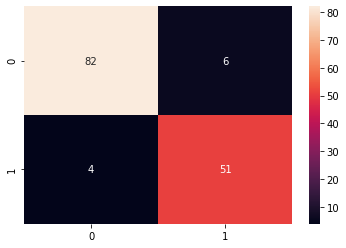

In [32]:
sns.heatmap(dtmatrix, annot=True)

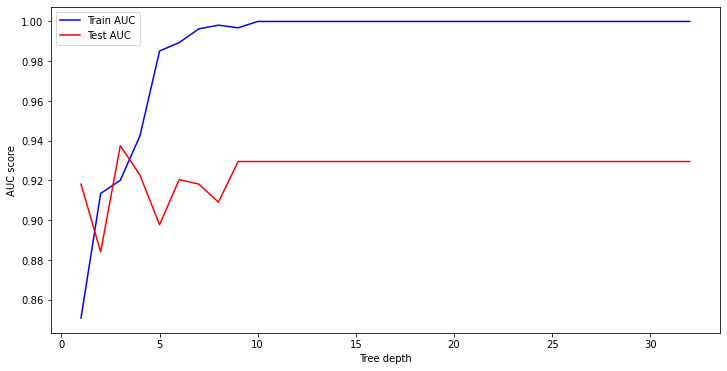

In [42]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

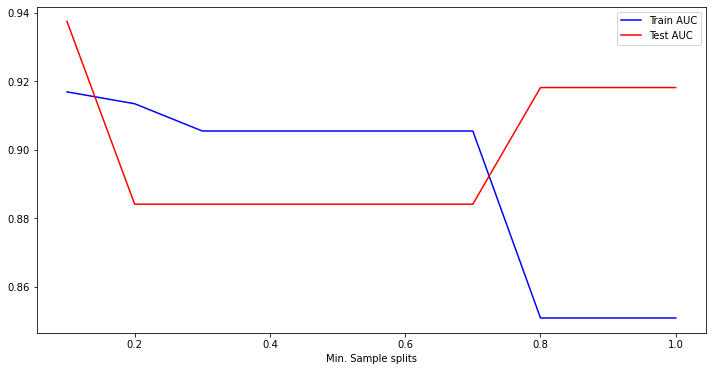

In [43]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

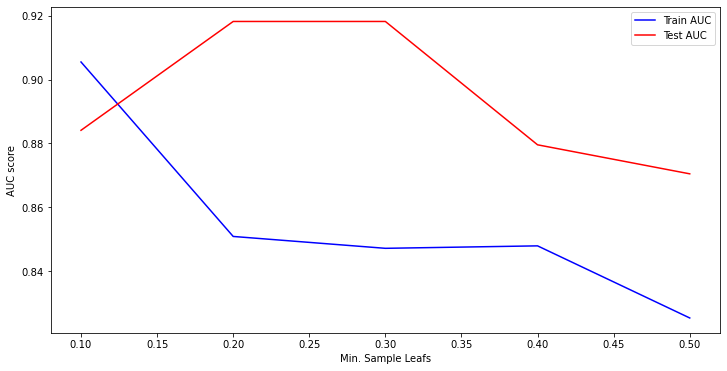

In [44]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

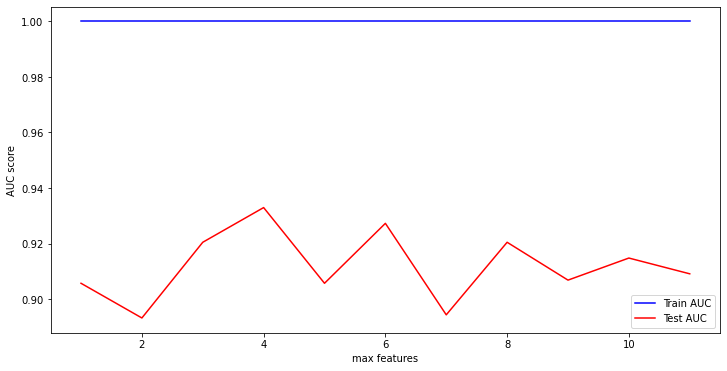

In [45]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [47]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=3,
                           max_depth=2,
                           min_samples_split=0.35,
                           min_samples_leaf=0.11, 
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7590909090909091

In [34]:
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

<AxesSubplot:>

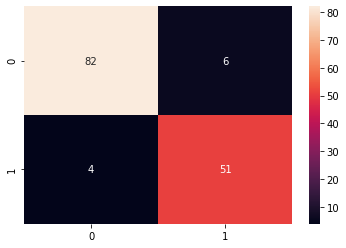

In [35]:
sns.heatmap(dtmatrix, annot=True)

In [48]:
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.9615384615384616


Training Recall:  1.0
Testing Recall:  0.9090909090909091


Training Accuracy:  1.0
Testing Accuracy:  0.951048951048951


Training F1-Score:  1.0
Testing F1-Score:  0.9345794392523366


##### Random Forest:

In [49]:
randomForest=RandomForestClassifier()
randomForestModel = randomForest.fit(X_train, y_train)
predictionRM = randomForestModel.predict(X_test)
rfmatrix = confusion_matrix(y_test, predictionRM)

In [50]:
y_hat_train = randomForestModel.predict(X_train)
y_hat_test = randomForestModel.predict(X_test)

<AxesSubplot:>

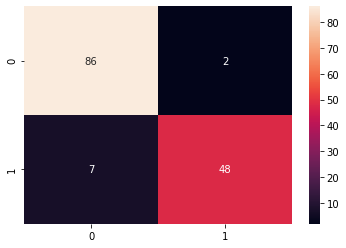

In [51]:
sns.heatmap(rfmatrix, annot=True)

In [52]:
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.96


Training Recall:  1.0
Testing Recall:  0.8727272727272727


Training Accuracy:  1.0
Testing Accuracy:  0.9370629370629371


Training F1-Score:  1.0
Testing F1-Score:  0.9142857142857144
